# Cosmic Watch Data Analysis

# Introduction
This code is at the begining stages, the goal is to create an analysis tool for cosmic watch data that is code based and readable to give students a place to start and the ability to read and change the code so the code is not another black box for the cosmic watch.

In [1]:
# imports some software packages we'll use
import pandas as pd #Pandas lets us name the columns of our data more likea spread sheet.
import numpy as np #Numpy is used by pandas for calculatiions
%matplotlib inline
import matplotlib as mpl #For ploting data
import matplotlib.pyplot as plt #For typing less when poloting data
import math #for other math we might do.

inline_rc = dict(mpl.rcParams) #Sets Parameters for plots.


data = pd.read_csv('https://raw.githubusercontent.com/dkallenberg/Quarknet-CosmicWatch-ipynb/main/CW_A_Data_2023_Jul_17_115758.csv')

data

,Event,RunTime,ADC,SiPM,DownTime,Temp
0,1,10464,319,57.64,2224,23.15
1,2,15548,354,67.99,3143,23.15
2,3,25203,307,54.48,4987,23.15
3,4,37766,418,96.60,7189,23.15
4,5,41864,396,85.28,7930,23.15
...,...,...,...,...,...,...
17956,17957,157445913,403,88.99,29468676,27.67
17957,17958,157451836,434,104.89,29469800,27.67
17958,17959,157455418,527,155.96,29470552,27.67
17959,17960,157463610,480,130.21,29472066,27.56


Next we are going to plot a hystogram of the event voltages, in part to see that the data was importated correctly, and also to see how it compares to other data sets.

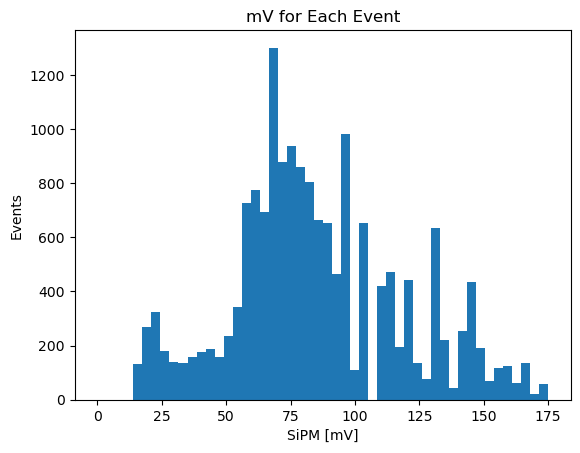

In [2]:
# This makes a histogram of that totally useless calculation above
plt.hist(data.SiPM, bins=50, range=[0,175], log=False)
plt.title("mV for Each Event")
plt.xlabel("SiPM [mV]")
plt.ylabel("Events");

It takes time for the CosmicWatch's processor to evaluate and report on events, this time is considered down time. The system reports out the down time, we need to use this to calculate the up time, the time when the Cosmic Watch was waiting for a hit. Using the up time we can calculate a rate for every event.

In [3]:
data['UpTime'] = (data.RunTime - data.DownTime)
data['Time'] = pd.to_timedelta(data.UpTime, unit='ms')
data['Minute']= (data.UpTime/(60000))
data.Minute = (data.Minute).astype(int)
data['avgRate'] = data.Event/(data.UpTime/1000)
data

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute,avgRate
0,1,10464,319,57.64,2224,23.15,8240,0 days 00:00:08.240000,0,0.121359
1,2,15548,354,67.99,3143,23.15,12405,0 days 00:00:12.405000,0,0.161225
2,3,25203,307,54.48,4987,23.15,20216,0 days 00:00:20.216000,0,0.148397
3,4,37766,418,96.60,7189,23.15,30577,0 days 00:00:30.577000,0,0.130817
4,5,41864,396,85.28,7930,23.15,33934,0 days 00:00:33.934000,0,0.147345
...,...,...,...,...,...,...,...,...,...,...
17956,17957,157445913,403,88.99,29468676,27.67,127977237,1 days 11:32:57.237000,2132,0.140314
17957,17958,157451836,434,104.89,29469800,27.67,127982036,1 days 11:33:02.036000,2133,0.140317
17958,17959,157455418,527,155.96,29470552,27.67,127984866,1 days 11:33:04.866000,2133,0.140321
17959,17960,157463610,480,130.21,29472066,27.56,127991544,1 days 11:33:11.544000,2133,0.140322


In [4]:
Data1Min = data.drop_duplicates(subset=['Minute'], keep='first')
Data1Min = Data1Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,10464,2224,8240,0 days 00:00:08.240000,0,0.121359
9,10,80889,15154,65735,0 days 00:01:05.735000,1,0.152126
14,15,167193,31243,135950,0 days 00:02:15.950000,2,0.110335
23,24,221895,41262,180633,0 days 00:03:00.633000,3,0.132866
30,31,296782,55244,241538,0 days 00:04:01.538000,4,0.128344
...,...,...,...,...,...,...,...
17930,17931,157155582,29414428,127741154,1 days 11:29:01.154000,2129,0.140370
17937,17938,157231983,29428602,127803381,1 days 11:30:03.381000,2130,0.140356
17942,17943,157308513,29443012,127865501,1 days 11:31:05.501000,2131,0.140327
17948,17949,157377345,29455908,127921437,1 days 11:32:01.437000,2132,0.140313


In [5]:
Data1Min['DeltaCount'] = Data1Min.Event - Data1Min.Event.shift(1)

Data1Min['DeltaUpTime'] = Data1Min.UpTime - Data1Min.UpTime.shift(1)

Data1Min['Rate'] = Data1Min.DeltaCount / (Data1Min.DeltaUpTime /1000)
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,10464,2224,8240,0 days 00:00:08.240000,0,0.121359,NaN,NaN,NaN
9,10,80889,15154,65735,0 days 00:01:05.735000,1,0.152126,9.0,57495.0,0.156535
14,15,167193,31243,135950,0 days 00:02:15.950000,2,0.110335,5.0,70215.0,0.071210
23,24,221895,41262,180633,0 days 00:03:00.633000,3,0.132866,9.0,44683.0,0.201419
30,31,296782,55244,241538,0 days 00:04:01.538000,4,0.128344,7.0,60905.0,0.114933
...,...,...,...,...,...,...,...,...,...,...
17930,17931,157155582,29414428,127741154,1 days 11:29:01.154000,2129,0.140370,6.0,54995.0,0.109101
17937,17938,157231983,29428602,127803381,1 days 11:30:03.381000,2130,0.140356,7.0,62227.0,0.112491
17942,17943,157308513,29443012,127865501,1 days 11:31:05.501000,2131,0.140327,5.0,62120.0,0.080489
17948,17949,157377345,29455908,127921437,1 days 11:32:01.437000,2132,0.140313,6.0,55936.0,0.107265


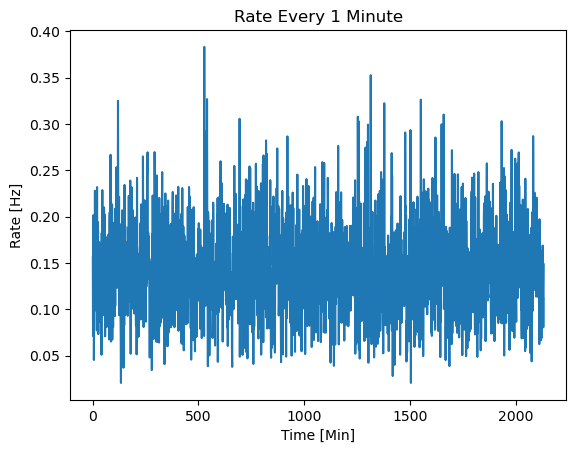

In [6]:
plt.plot(Data1Min.Minute,Data1Min.Rate)
plt.title("Rate Every 1 Minute")
plt.xlabel("Time [Min]")
plt.ylabel("Rate [Hz]");

In [7]:
#Data5Min = pd.DataFrame(columns=['Event','DownTime','Uptime','Minute'])
Data5Min = Data1Min.query('Minute % 5 == 0')

Data5Min = Data5Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,10464,2224,8240,0 days 00:00:08.240000,0,0.121359
39,40,374622,69688,304934,0 days 00:05:04.934000,5,0.131176
75,76,739700,137186,602514,0 days 00:10:02.514000,10,0.126138
125,126,1128997,209423,919574,0 days 00:15:19.574000,15,0.137020
160,161,1485500,275567,1209933,0 days 00:20:09.933000,20,0.133065
...,...,...,...,...,...,...,...
17777,17778,155760673,29152508,126608165,1 days 11:10:08.165000,2110,0.140417
17825,17826,156143804,29224386,126919418,1 days 11:15:19.418000,2115,0.140451
17862,17863,156492780,29289890,127202890,1 days 11:20:02.890000,2120,0.140429
17898,17899,156863277,29359574,127503703,1 days 11:25:03.703000,2125,0.140380


In [8]:
Data5Min['DeltaCount'] = Data5Min.Event - Data5Min.Event.shift(1)
Data5Min['DeltaUpTime'] = Data5Min.UpTime - Data5Min.UpTime.shift(1)
Data5Min['Rate'] = Data5Min.DeltaCount / (Data5Min.DeltaUpTime /1000)


Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,10464,2224,8240,0 days 00:00:08.240000,0,0.121359,NaN,NaN,NaN
39,40,374622,69688,304934,0 days 00:05:04.934000,5,0.131176,39.0,296694.0,0.131449
75,76,739700,137186,602514,0 days 00:10:02.514000,10,0.126138,36.0,297580.0,0.120976
125,126,1128997,209423,919574,0 days 00:15:19.574000,15,0.137020,50.0,317060.0,0.157699
160,161,1485500,275567,1209933,0 days 00:20:09.933000,20,0.133065,35.0,290359.0,0.120540
...,...,...,...,...,...,...,...,...,...,...
17777,17778,155760673,29152508,126608165,1 days 11:10:08.165000,2110,0.140417,44.0,302462.0,0.145473
17825,17826,156143804,29224386,126919418,1 days 11:15:19.418000,2115,0.140451,48.0,311253.0,0.154215
17862,17863,156492780,29289890,127202890,1 days 11:20:02.890000,2120,0.140429,37.0,283472.0,0.130524
17898,17899,156863277,29359574,127503703,1 days 11:25:03.703000,2125,0.140380,36.0,300813.0,0.119676


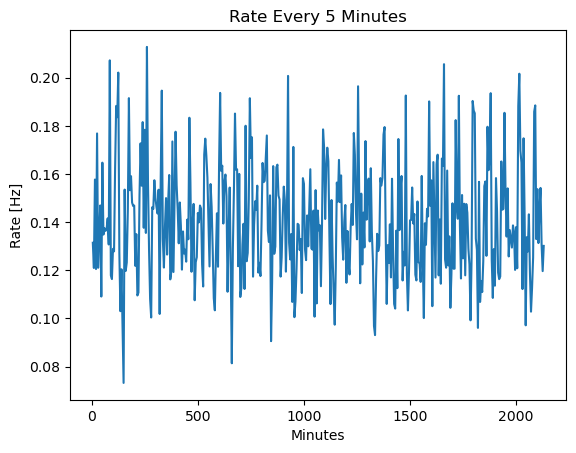

In [9]:
plt.plot(Data5Min.Minute,Data5Min.Rate)
plt.title("Rate Every 5 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");

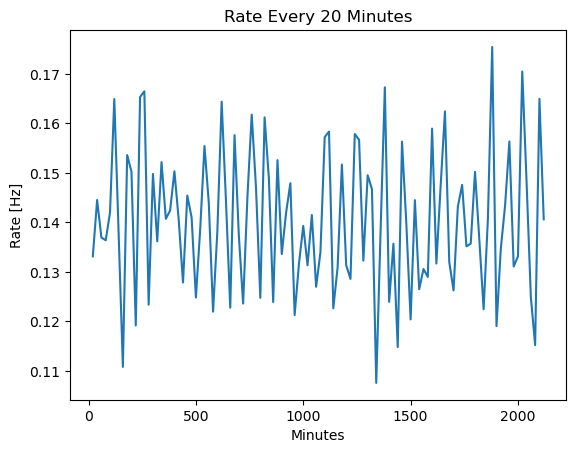

In [10]:
Data20Min = Data1Min.query('Minute % 20 == 0')

Data20Min = Data20Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data20Min['DeltaCount'] = Data20Min.Event - Data20Min.Event.shift(1)

Data20Min['DeltaUpTime'] = Data20Min.UpTime - Data20Min.UpTime.shift(1)

Data20Min['Rate'] = Data20Min.DeltaCount / (Data20Min.DeltaUpTime /1000)

plt.plot(Data20Min.Minute,Data20Min.Rate)
plt.title("Rate Every 20 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");